<a href="https://colab.research.google.com/github/sajnanoushad/house_price-/blob/main/houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

In [2]:
df = pd.read_csv('/content/house_price.csv')

 Show basic info and describe data

In [4]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  int64  
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 722.0+ KB


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


Basic EDA
Visualize price per sqft distribution

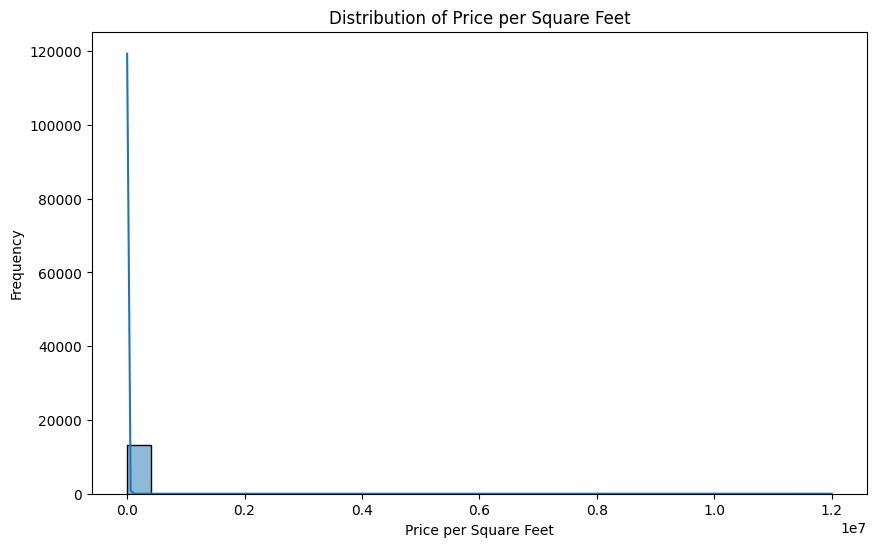

In [5]:
plt.figure(figsize=(10, 6))

sns.histplot(df['price_per_sqft'], bins=30, kde=True)

plt.title('Distribution of Price per Square Feet')

plt.xlabel('Price per Square Feet')

plt.ylabel('Frequency')

plt.show()

 Detect and Remove Outliers Mean and Standard Deviation

In [6]:
mean = df['price_per_sqft'].mean()

std = df['price_per_sqft'].std()

df_mean_trimmed = df[df['price_per_sqft'] < (mean + 3 * std)]

Percentile Method

In [7]:
lower = df['price_per_sqft'].quantile(0.01)

upper = df['price_per_sqft'].quantile(0.99)

df_percentile_trimmed = df[(df['price_per_sqft'] >= lower) & (df['price_per_sqft'] <= upper)]

 IQR Method

In [8]:
Q1 = df['price_per_sqft'].quantile(0.25)

Q3 = df['price_per_sqft'].quantile(0.75)

IQR = Q3 - Q1

df_IQR_trimmed = df[(df['price_per_sqft'] >= (Q1 - 1.5 * IQR)) & (df['price_per_sqft'] <= (Q3 + 1.5 * IQR))]

Z-Score Method

In [9]:
df_zscore_trimmed = df[(np.abs(stats.zscore(df['price_per_sqft'])) < 3)]

Box Plot to Analyze Outliers

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


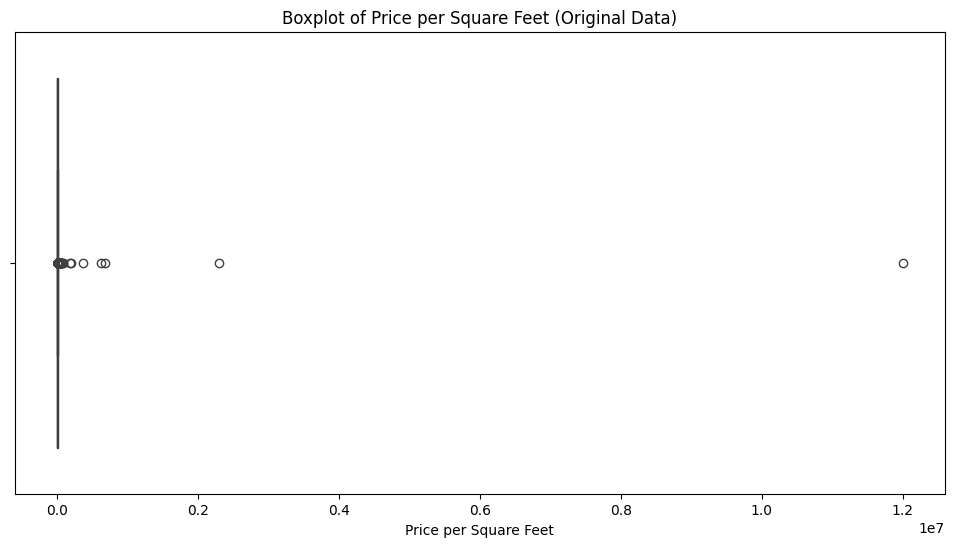

In [10]:
plt.figure(figsize=(12, 6))

sns.boxplot(x=df['price_per_sqft'])

plt.title('Boxplot of Price per Square Feet (Original Data)')

plt.xlabel('Price per Square Feet')

plt.show()

Check Normality with Histplot

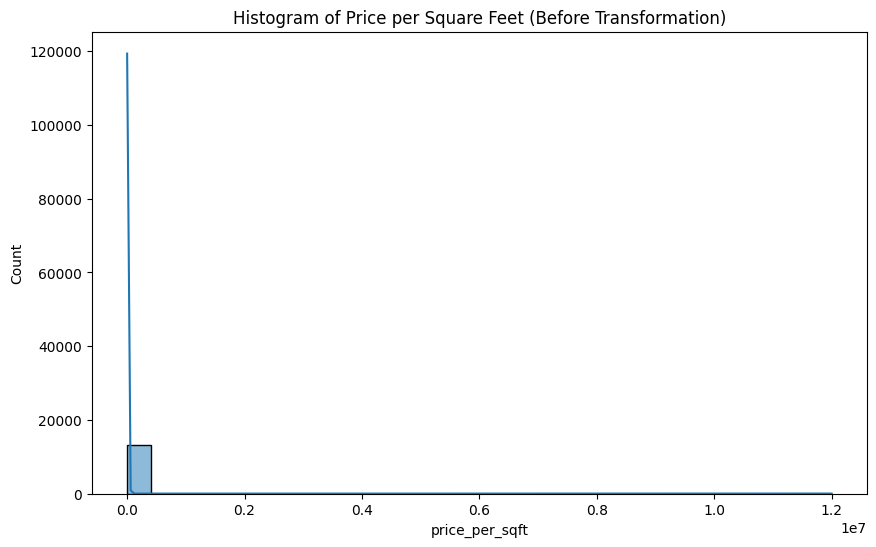

In [11]:
plt.figure(figsize=(10, 6))

sns.histplot(df['price_per_sqft'], bins=30, kde=True)

plt.title('Histogram of Price per Square Feet (Before Transformation)')

plt.show()

Log Transformation

In [12]:
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

 Histogram after Log Transformation

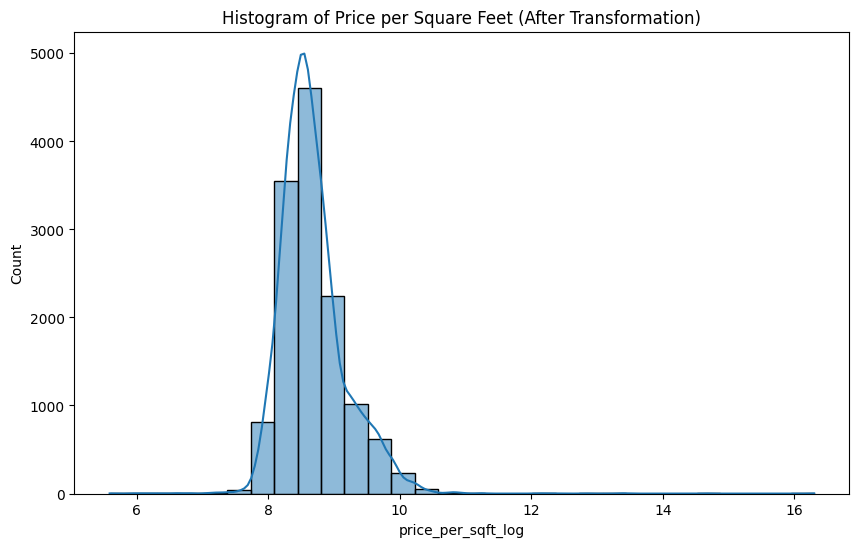

In [13]:
plt.figure(figsize=(10, 6))

sns.histplot(df['price_per_sqft_log'], bins=30, kde=True)

plt.title('Histogram of Price per Square Feet (After Transformation)')

plt.show()

 Check Correlation with Heatmap

Convert all columns to numeric, forcing errors to NaN for non-numeric values

In [14]:

df = df.apply(pd.to_numeric, errors='coerce')

Calculate the correlation matrix

In [15]:
correlation_matrix = df.corr()

Create the heatmap

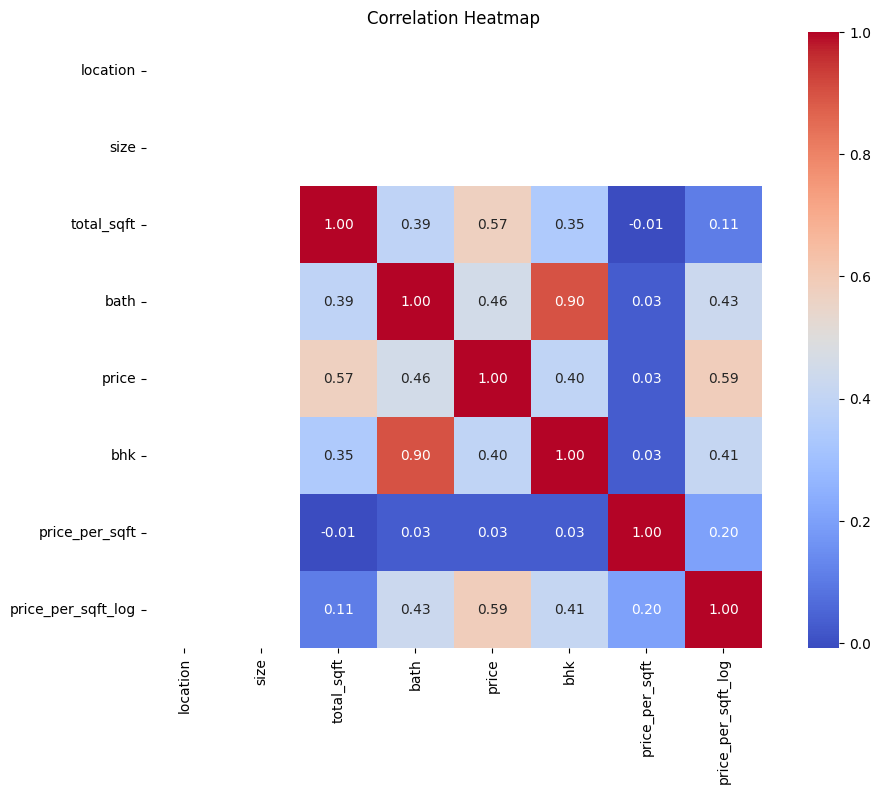

In [16]:
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title('Correlation Heatmap')

plt.show()